In [1]:
import sys
sys.path.insert(0, '../')

In [2]:
from ada.regression import KernelLasso

In [3]:
from sklearn.datasets import load_diabetes

In [4]:
data, target = load_diabetes(return_X_y=True)

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

In [6]:
model = KernelLasso(l1=0.1, eps=1e-7, verbose=True)
model.fit(data, target)

0 378.894032511
10000 0.00220885175718
20000 0.000642138339544
30000 0.000287674252796
40000 0.00014414050387
50000 8.52796400269e-05
60000 5.40106458654e-05
70000 3.69389057838e-05
80000 2.51243984844e-05
90000 1.84113532365e-05
100000 1.32359089122e-05
110000 8.92834527968e-06
120000 6.30040510971e-06
130000 4.88381387063e-06
140000 3.84152693164e-06
150000 3.18424972538e-06
160000 2.70427130181e-06
170000 2.19668639235e-06
180000 1.90171488943e-06
190000 1.67138989355e-06
200000 1.48431170273e-06
210000 1.32841210502e-06
220000 1.19737625558e-06
230000 1.0863989693e-06
240000 9.89394089332e-07
250000 9.01540977071e-07
260000 8.2188000307e-07
270000 7.43246966244e-07
280000 6.74834160551e-07
290000 6.15432301912e-07
300000 5.62512034104e-07
310000 5.15017872487e-07
320000 4.72194849392e-07
330000 4.33447200746e-07
340000 3.98286692946e-07
350000 3.66304577397e-07
360000 3.37153681676e-07
370000 3.10535941391e-07
380000 2.86193258442e-07
390000 2.63900553967e-07
400000 2.43460358274e-

KernelLasso(check_conv=10000, eps=1e-07, h=0.1,
      kernel=<function gaussian_kernel at 0x10d0169d8>, l1=0.1,
      max_iter=1000000, verbose=True)

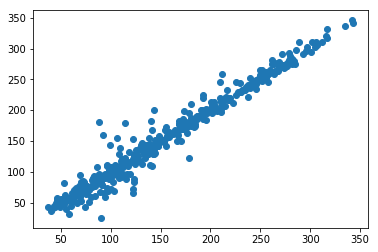

In [7]:
plt.scatter(model.predict(data), target)

In [8]:
print("{}/{}".format(sum(abs(model.theta) < 1e-7), len(model.theta)))

50/442
